## **Flow-Chart**

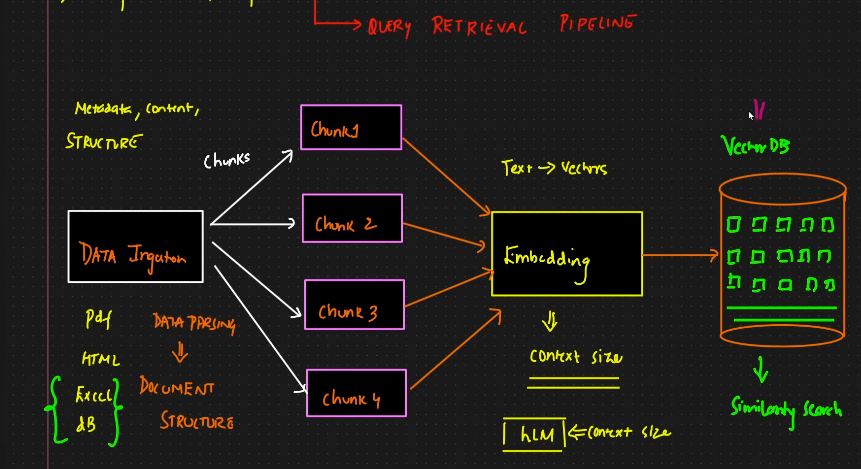

## Data Ingestion

In [1]:
# Document Data-Structure

from langchain_core.documents import Document

In [2]:
doc = Document(
    page_content="This is the main text content I 'm using to create RAG.",
    metadata = {
        "source" : "example.txt",
        "pages" : 1,
        "author" : "Soubhik Sinha",
        "date_created" : "2025-09-28"
    }
)

# The above metadata can help when applied similarity search (as filters)

In [3]:
doc

Document(metadata={'source': 'example.txt', 'pages': 1, 'author': 'Soubhik Sinha', 'date_created': '2025-09-28'}, page_content="This is the main text content I 'm using to create RAG.")

In [4]:
# Creating a (.txt) file folder

import os
os.makedirs("../data/text_files", exist_ok = True)

In [5]:
sample_texts = {
    "../data/text_files/python_intro.txt" : """Python Introduction

Python is a high-level, interpreted programming language known for its simplicity and readability. Created by Guido van Rossum in 1991, Python has grown into one of the most widely used languages in software development, data science, artificial intelligence, web development, and automation. Its syntax is easy to learn, making it beginner-friendly, while its vast ecosystem of libraries and frameworks makes it powerful for professionals.

Python supports multiple programming paradigms, including object-oriented, procedural, and functional programming. Popular libraries such as NumPy, Pandas, TensorFlow, and Flask extend its capabilities across diverse domains like data analysis, machine learning, and web applications. With an active community and strong industry adoption, Python continues to be a go-to language for solving real-world problems.
""",
"../data/text_files/ML_intro.txt" : """Machine Learning Introduction

Machine Learning (ML) is a branch of Artificial Intelligence that enables systems to automatically learn from data and improve performance without being explicitly programmed. Instead of following fixed rules, ML algorithms identify patterns, build models, and make predictions or decisions based on input data.

It is widely used in areas such as image and speech recognition, natural language processing, recommendation systems, healthcare, and finance. Common approaches include supervised learning, unsupervised learning, and reinforcement learning. With the growth of big data and advanced computing power, ML has become a core technology driving innovations in AI and automation.
"""
}

for filepath, content in sample_texts.items():
    with open(filepath, 'w', encoding = "utf-8") as f:
        f.write(content)
    
print("✅ Sample text file(s) created !")

✅ Sample text file(s) created !


In [6]:
# Reading the text files content using TextLoader

from langchain.document_loaders import TextLoader
from langchain_community.document_loaders import TextLoader

loader = TextLoader("../data/text_files/python_intro.txt", encoding="utf-8")
document = loader.load()
print(document) # Here the content of the text file is returned as a "Document Structure"

[Document(metadata={'source': '../data/text_files/python_intro.txt'}, page_content='Python Introduction\n\nPython is a high-level, interpreted programming language known for its simplicity and readability. Created by Guido van Rossum in 1991, Python has grown into one of the most widely used languages in software development, data science, artificial intelligence, web development, and automation. Its syntax is easy to learn, making it beginner-friendly, while its vast ecosystem of libraries and frameworks makes it powerful for professionals.\n\nPython supports multiple programming paradigms, including object-oriented, procedural, and functional programming. Popular libraries such as NumPy, Pandas, TensorFlow, and Flask extend its capabilities across diverse domains like data analysis, machine learning, and web applications. With an active community and strong industry adoption, Python continues to be a go-to language for solving real-world problems.\n')]


In [7]:
# Directory Loader
from langchain_community.document_loaders import DirectoryLoader

# Loading all the text files from the directory
dir_loader = DirectoryLoader(
    "../data/text_files",
    glob = "**/*.txt", # Pattern to match files
    loader_cls = TextLoader, # Loader class to use
    loader_kwargs = {'encoding' : 'utf-8'}, # File loading encoder
    show_progress = True
)

documents = dir_loader.load()

100%|██████████| 2/2 [00:00<00:00, 3905.31it/s]


In [8]:
documents

[Document(metadata={'source': '../data/text_files/python_intro.txt'}, page_content='Python Introduction\n\nPython is a high-level, interpreted programming language known for its simplicity and readability. Created by Guido van Rossum in 1991, Python has grown into one of the most widely used languages in software development, data science, artificial intelligence, web development, and automation. Its syntax is easy to learn, making it beginner-friendly, while its vast ecosystem of libraries and frameworks makes it powerful for professionals.\n\nPython supports multiple programming paradigms, including object-oriented, procedural, and functional programming. Popular libraries such as NumPy, Pandas, TensorFlow, and Flask extend its capabilities across diverse domains like data analysis, machine learning, and web applications. With an active community and strong industry adoption, Python continues to be a go-to language for solving real-world problems.\n'),
 Document(metadata={'source': '

In [9]:
# If we also need to read through the PDF files and the text files

# Loading all the PDF files from the directory
from langchain_community.document_loaders import PyPDFLoader, PyMuPDFLoader

dir_loader = DirectoryLoader(
    "../data/pdf_files",
    glob = "**/*.pdf", # Pattern to match files
    loader_cls = PyMuPDFLoader, # Loader class to use
    # loader_kwargs = {'encoding' : 'utf-8'}, # File loading encoder
    show_progress = True
)

pdf_documents = dir_loader.load()
pdf_documents

/Users/soubhiksinha/GitHub/RAG-Basics/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
100%|██████████| 2/2 [00:00<00:00, 15.74it/s]


[Document(metadata={'producer': 'PyPDF2', 'creator': '', 'creationdate': '', 'source': '../data/pdf_files/attention.pdf', 'file_path': '../data/pdf_files/attention.pdf', 'total_pages': 11, 'format': 'PDF 1.3', 'title': 'Attention is All you Need', 'author': 'Ashish Vaswani, Noam Shazeer, Niki Parmar, Jakob Uszkoreit, Llion Jones, Aidan N. Gomez, Łukasz Kaiser, Illia Polosukhin', 'subject': 'Neural Information Processing Systems http://nips.cc/', 'keywords': '', 'moddate': '2018-02-12T21:22:10-08:00', 'trapped': '', 'modDate': "D:20180212212210-08'00'", 'creationDate': '', 'page': 0}, page_content='Attention Is All You Need\nAshish Vaswani∗\nGoogle Brain\navaswani@google.com\nNoam Shazeer∗\nGoogle Brain\nnoam@google.com\nNiki Parmar∗\nGoogle Research\nnikip@google.com\nJakob Uszkoreit∗\nGoogle Research\nusz@google.com\nLlion Jones∗\nGoogle Research\nllion@google.com\nAidan N. Gomez∗†\nUniversity of Toronto\naidan@cs.toronto.edu\nŁukasz Kaiser∗\nGoogle Brain\nlukaszkaiser@google.com\nIll

In [10]:
type(pdf_documents[0])

langchain_core.documents.base.Document

<br>
<br>

## Chunking, Embedding and VectorStoreDB

In [11]:
from langchain.text_splitter import RecursiveCharacterTextSplitter
from pathlib import Path

In [12]:
# Reading all the pdf's inside the directory
def process_all_pdfs(pdf_directory):
    """Process all PDF files in a directory"""
    all_documents = []
    pdf_dir = Path(pdf_directory)
    
    # Finding all PDF files recursively
    pdf_files = list(pdf_dir.glob("**/*.pdf"))
    
    print(f"Found {len(pdf_files)} PDF files to process")
    
    for pdf_file in pdf_files:
        print(f"\nProcessing: {pdf_file.name}")
        try:
            loader = PyPDFLoader(str(pdf_file))
            documents = loader.load()
            
            # Adding source information to metadata
            for doc in documents:
                doc.metadata['source_file'] = pdf_file.name
                doc.metadata['file_type'] = 'pdf'
            
            all_documents.extend(documents)
            print(f"  ✓ Loaded {len(documents)} pages")
            
        except Exception as e:
            print(f"  ✗ Error: {e}")
    
    print(f"\nTotal documents loaded: {len(all_documents)}")
    return all_documents

# Process all PDFs in the data directory
all_pdf_documents = process_all_pdfs("../data")

Found 2 PDF files to process

Processing: attention.pdf
  ✓ Loaded 11 pages

Processing: YOLO.pdf
  ✓ Loaded 10 pages

Total documents loaded: 21


In [13]:
all_pdf_documents

[Document(metadata={'producer': 'PyPDF2', 'creator': 'PyPDF', 'creationdate': '', 'subject': 'Neural Information Processing Systems http://nips.cc/', 'publisher': 'Curran Associates, Inc.', 'language': 'en-US', 'created': '2017', 'eventtype': 'Poster', 'description-abstract': 'The dominant sequence transduction models are based on complex recurrent orconvolutional neural networks in an encoder and decoder configuration. The best performing such models also connect the encoder and decoder through an attentionm echanisms.  We propose a novel, simple network architecture based solely onan attention mechanism, dispensing with recurrence and convolutions entirely.Experiments on two machine translation tasks show these models to be superiorin quality while being more parallelizable and requiring significantly less timeto train. Our single model with 165 million parameters, achieves 27.5 BLEU onEnglish-to-German translation, improving over the existing best ensemble result by over 1 BLEU. On 

In [14]:
# Text splitting get into chunks

def split_documents(documents,chunk_size=1000,chunk_overlap=200):
    """Split documents into smaller chunks for better RAG performance"""
    text_splitter = RecursiveCharacterTextSplitter(
        chunk_size=chunk_size,
        chunk_overlap=chunk_overlap,
        length_function=len,
        separators=["\n\n", "\n", " ", ""]
    )
    split_docs = text_splitter.split_documents(documents)
    print(f"Split {len(documents)} documents into {len(split_docs)} chunks")
    
    # Showing example of a chunk
    if split_docs:
        print(f"\nExample chunk:")
        print(f"Content: {split_docs[0].page_content[:200]}...")
        print(f"Metadata: {split_docs[0].metadata}")
    
    return split_docs

In [15]:
chunks=split_documents(all_pdf_documents)
chunks

Split 21 documents into 98 chunks

Example chunk:
Content: Attention Is All You Need
Ashish Vaswani∗
Google Brain
avaswani@google.com
Noam Shazeer∗
Google Brain
noam@google.com
Niki Parmar∗
Google Research
nikip@google.com
Jakob Uszkoreit∗
Google Research
usz...
Metadata: {'producer': 'PyPDF2', 'creator': 'PyPDF', 'creationdate': '', 'subject': 'Neural Information Processing Systems http://nips.cc/', 'publisher': 'Curran Associates, Inc.', 'language': 'en-US', 'created': '2017', 'eventtype': 'Poster', 'description-abstract': 'The dominant sequence transduction models are based on complex recurrent orconvolutional neural networks in an encoder and decoder configuration. The best performing such models also connect the encoder and decoder through an attentionm echanisms.  We propose a novel, simple network architecture based solely onan attention mechanism, dispensing with recurrence and convolutions entirely.Experiments on two machine translation tasks show these models to be superiorin

[Document(metadata={'producer': 'PyPDF2', 'creator': 'PyPDF', 'creationdate': '', 'subject': 'Neural Information Processing Systems http://nips.cc/', 'publisher': 'Curran Associates, Inc.', 'language': 'en-US', 'created': '2017', 'eventtype': 'Poster', 'description-abstract': 'The dominant sequence transduction models are based on complex recurrent orconvolutional neural networks in an encoder and decoder configuration. The best performing such models also connect the encoder and decoder through an attentionm echanisms.  We propose a novel, simple network architecture based solely onan attention mechanism, dispensing with recurrence and convolutions entirely.Experiments on two machine translation tasks show these models to be superiorin quality while being more parallelizable and requiring significantly less timeto train. Our single model with 165 million parameters, achieves 27.5 BLEU onEnglish-to-German translation, improving over the existing best ensemble result by over 1 BLEU. On 

In [16]:
import numpy as np
from sentence_transformers import SentenceTransformer
import chromadb
from chromadb.config import Settings
import uuid
from typing import List, Dict, Any, Tuple
from sklearn.metrics.pairwise import cosine_similarity

In [17]:
# Embedding

class EmbeddingManager:
    """Handles document embedding generation using SentenceTransformer"""

    def __init__(self, model_name: str = "all-MiniLM-L6-v2"): # 384 dimensions
        """Initialize the embedding manager
        
        Args:
            model_name: HuggingFace model name for Sentence Embeddings
        """
        self.model_name = model_name
        self.model = None
        self._load_model()
    
    def _load_model(self): # Adding extra under-score in the beginning of the function name : Protected Function
        """Load teh SentenceTransformer model"""

        try:
            print(f"Loading embedding model: {self.model_name}")
            self.model = SentenceTransformer(self.model_name)
            print(f"Model loaded successfully! Embedding Dimension : {self.model.get_sentence_embedding_dimension()}")
        except Exception as e:
            print(f"Error loading model {self.model_name}: {e}")
            raise
    
    def generate_embeddings(self, texts: List[str]) -> np.ndarray:
        """
        Generate embeddings for a list of texts

        Args:
            texts: List of text strings to embed
        
        Returns:
            numpy array of embeddings with shape (len(texts), embedding_dim)
        """
        if not self.model:
            raise ValueError("Model not loaded")
    
        print(f"Generating embeddings for {len(texts)} texts ...")
        embeddings = self.model.encode(texts, show_progress_bar = True)
        print(f"Generated embeddings with shape: {embeddings.shape}")
        return embeddings

# Initializing teh embedding manager
embedding_manager = EmbeddingManager()
embedding_manager

Loading embedding model: all-MiniLM-L6-v2
Model loaded successfully! Embedding Dimension : 384


In [18]:
# VectorStore Class

class VectorStore:
    """Manages document embeddings in a ChromaDB vector store"""

    def __init__(self, collection_name: str = "pdf_documents", persist_directory: str = "../data/vector_store"):
        """
        Initialize the vector store

        Args:
            collection_name: Name of the Chroma DB collection
            persist_directory: Directory to persist the vector store
        """
        self.collection_name = collection_name
        self.persist_directory = persist_directory
        self.client = None
        self.collection = None
        self._initialize_store() # Protected Function
    
    def _initialize_store(self):
        """Initialize ChromaDB client and collection"""

        try:
            # Creating persistent ChromaDB client
            os.makedirs(self.persist_directory, exist_ok=True)
            self.client = chromadb.PersistentClient(path = self.persist_directory)

            # Get/Create Collection
            self.collection = self.client.get_or_create_collection(
                name = self.collection_name,
                metadata={"description" : "PDF document embeddings for RAG"}
            )

            print(f"Vector Store Initialized! Collection: {self.collection_name}")
            print(f"Existing documents in collection: {self.collection.count()}")
        except Exception as e:
            print(f"Error initializing vector store : {e}")
            raise
    
    def add_documents(self, documents: List[Any], embeddings: np.ndarray):
        """
        Add documents and their embeddings to the Vector Store
        
        Args:
            documents: List of Langchain Documents
            embeddings: Corresponding embeddings of the documents
        """
        if len(documents) != len(embeddings):
            raise ValueError("Numebr of documents must match the number of embeddings")
        
        print(f"Adding {len(documents)} documents to vector store...")

        # Preparing data for ChromaDB
        ids = []
        metadatas = []
        documents_text = []
        embeddings_list = []

        for i, (doc, embedding) in enumerate(zip(documents, embeddings)):
            # Generating Unique IDs
            doc_id = f"doc_{uuid.uuid4().hex[:8]}_{i}"
            ids.append(doc_id)

            # Preparing metadata
            metadata = dict(doc.metadata)
            metadata['doc_index'] = i
            metadata['content_length'] = len(doc.page_content)
            metadatas.append(metadata)

            # Document content
            documents_text.append(doc.page_content)

            # Embedding
            embeddings_list.append(embedding.tolist())
        
        # Adding the documents to teh Vector Store
        try:
            self.collection.add(
                ids = ids,
                embeddings = embeddings_list,
                metadatas=metadatas,
                documents = documents_text
            )
            print(f"Successfully Added {len(documents)} documents to the Vector Store!")
            print(f"Total documents in collection: {self.collection.count()}")
        except Exception as e:
            print(f"Error adding documents to the Vector Store: {e}")
            raise

# Initializiing Vector Store
vector_store = VectorStore()
vector_store

Vector Store Initialized! Collection: pdf_documents
Existing documents in collection: 196


In [19]:
chunks

[Document(metadata={'producer': 'PyPDF2', 'creator': 'PyPDF', 'creationdate': '', 'subject': 'Neural Information Processing Systems http://nips.cc/', 'publisher': 'Curran Associates, Inc.', 'language': 'en-US', 'created': '2017', 'eventtype': 'Poster', 'description-abstract': 'The dominant sequence transduction models are based on complex recurrent orconvolutional neural networks in an encoder and decoder configuration. The best performing such models also connect the encoder and decoder through an attentionm echanisms.  We propose a novel, simple network architecture based solely onan attention mechanism, dispensing with recurrence and convolutions entirely.Experiments on two machine translation tasks show these models to be superiorin quality while being more parallelizable and requiring significantly less timeto train. Our single model with 165 million parameters, achieves 27.5 BLEU onEnglish-to-German translation, improving over the existing best ensemble result by over 1 BLEU. On 

In [20]:
# Converting Text to Embeddings 
texts=[doc.page_content for doc in chunks]
texts

['Attention Is All You Need\nAshish Vaswani∗\nGoogle Brain\navaswani@google.com\nNoam Shazeer∗\nGoogle Brain\nnoam@google.com\nNiki Parmar∗\nGoogle Research\nnikip@google.com\nJakob Uszkoreit∗\nGoogle Research\nusz@google.com\nLlion Jones∗\nGoogle Research\nllion@google.com\nAidan N. Gomez∗†\nUniversity of Toronto\naidan@cs.toronto.edu\nŁukasz Kaiser ∗\nGoogle Brain\nlukaszkaiser@google.com\nIllia Polosukhin∗‡\nillia.polosukhin@gmail.com\nAbstract\nThe dominant sequence transduction models are based on complex recurrent or\nconvolutional neural networks that include an encoder and a decoder. The best\nperforming models also connect the encoder and decoder through an attention\nmechanism. We propose a new simple network architecture, the Transformer,\nbased solely on attention mechanisms, dispensing with recurrence and convolutions\nentirely. Experiments on two machine translation tasks show these models to\nbe superior in quality while being more parallelizable and requiring signiﬁcant

In [21]:
# Generating the Embeddings
embeddings=embedding_manager.generate_embeddings(texts)

Generating embeddings for 98 texts ...


Batches: 100%|██████████| 4/4 [00:02<00:00,  1.85it/s]

Generated embeddings with shape: (98, 384)


In [22]:
# Storing in the vector database
vector_store.add_documents(chunks,embeddings)

Adding 98 documents to vector store...
Successfully Added 98 documents to the Vector Store!
Total documents in collection: 294


<br>
<br>

## **Retriever Pipeline From VectorStoreDB**

In [23]:
class RAGRetriever:
    """Handles query-based retrieval from the vector store"""
    
    def __init__(self, vector_store: VectorStore, embedding_manager: EmbeddingManager):
        """
        Initialize the retriever
        
        Args:
            vector_store: Vector store containing document embeddings
            embedding_manager: Manager for generating query embeddings
        """
        self.vector_store = vector_store
        self.embedding_manager = embedding_manager

    def retrieve(self, query: str, top_k: int = 5, score_threshold: float = 0.0) -> List[Dict[str, Any]]:
        """
        Retrieve relevant documents for a query
        
        Args:
            query: The search query
            top_k: Number of top (k) results to return
            score_threshold: Minimum similarity score threshold
            
        Returns:
            List of dictionaries containing retrieved documents and metadata
        """
        print(f"Retrieving documents for query: '{query}'")
        print(f"Top K: {top_k}, Score threshold: {score_threshold}")
        
        # Generating query embedding
        query_embedding = self.embedding_manager.generate_embeddings([query])[0]
        
        # Searching in vector store
        try:
            results = self.vector_store.collection.query(
                query_embeddings=[query_embedding.tolist()],
                n_results=top_k
            )
            
            # Processing results
            retrieved_docs = []
            
            if results['documents'] and results['documents'][0]:
                documents = results['documents'][0]
                metadatas = results['metadatas'][0]
                distances = results['distances'][0]
                ids = results['ids'][0]
                
                for i, (doc_id, document, metadata, distance) in enumerate(zip(ids, documents, metadatas, distances)):
                    # Converting distance to similarity score (ChromaDB uses cosine distance)
                    similarity_score = 1 - distance
                    
                    if similarity_score >= score_threshold:
                        retrieved_docs.append({
                            'id': doc_id,
                            'content': document,
                            'metadata': metadata,
                            'similarity_score': similarity_score,
                            'distance': distance,
                            'rank': i + 1
                        })
                
                print(f"Retrieved {len(retrieved_docs)} documents (after filtering)")
            else:
                print("No documents found")
            
            return retrieved_docs
            
        except Exception as e:
            print(f"Error during retrieval: {e}")
            return []

rag_retriever=RAGRetriever(vector_store,embedding_manager)

In [24]:
rag_retriever

In [25]:
rag_retriever.retrieve("Attention is all you need")

Retrieving documents for query: 'Attention is all you need'
Top K: 5, Score threshold: 0.0
Generating embeddings for 1 texts ...


Batches: 100%|██████████| 1/1 [00:01<00:00,  1.13s/it]

Generated embeddings with shape: (1, 384)
Retrieved 3 documents (after filtering)


[{'id': 'doc_6cf0702a_25',
  'content': 'convolution is equal to the combination of a self-attention layer and a point-wise feed-forward layer,\nthe approach we take in our model.\nAs side beneﬁt, self-attention could yield more interpretable models. We inspect attention distributions\nfrom our models and present and discuss examples in the appendix. Not only do individual attention\nheads clearly learn to perform different tasks, many appear to exhibit behavior related to the syntactic\nand semantic structure of the sentences.\n5 Training\nThis section describes the training regime for our models.\n5.1 Training Data and Batching\nWe trained on the standard WMT 2014 English-German dataset consisting of about 4.5 million\nsentence pairs. Sentences were encoded using byte-pair encoding [ 3], which has a shared source-\ntarget vocabulary of about 37000 tokens. For English-French, we used the signiﬁcantly larger WMT\n2014 English-French dataset consisting of 36M sentences and split tokens 

<br>
<br>

## **RAG Pipeline- VectorDB To LLM Output Generation**

In [26]:
from dotenv import load_dotenv
load_dotenv()

# print(os.getenv("GROQ_API_KEY"))

True